In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the PCA_format (PCA dimensionality reduction applied) csv file as a dataframe
df = pd.read_csv('/Users/nikanhassanipak/Library/Mobile Documents/com~apple~CloudDocs/Georgia Tech/Spring 2024/CS 4641/Project/PCA_format.csv')

# Add a column to df that extracts the base number of each song file (to be used later to ensure that all versions of a song remain on the 
# same side of the train-test split)
df['base_num'] = df['base_name'].apply(lambda x: int(x.split('.')[-1]))
df

,filename,base_name,genre,PC1,PC2,PC3,PC4,PC5,PC6,PC7,...,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,base_num
0,jazz.00054.wav,jazz.00054,jazz,-0.362108,-0.686760,-2.662810,-0.306064,-0.539221,1.203600,-1.990127,...,-0.524807,0.080433,0.151330,0.283339,0.416750,0.537629,0.211101,-0.110876,-0.518717,54
1,jazz.00054.wav_noise,jazz.00054,jazz,-0.562811,-0.173119,-3.453283,0.290839,-0.531631,1.588254,-1.345839,...,-0.600776,0.042130,0.081003,0.386982,0.546015,0.677045,0.156464,-0.202504,-0.489039,54
2,jazz.00054.wav_stretch,jazz.00054,jazz,0.245287,-1.333503,-2.516458,-0.184981,0.002653,0.241648,-1.288113,...,-0.229208,0.229197,0.135633,0.140482,0.383771,0.142976,0.351715,0.051232,-0.288624,54
3,jazz.00054.wav_shift,jazz.00054,jazz,-1.372184,-2.154270,-0.303323,0.131598,0.194095,-0.408942,-2.545335,...,-0.134308,-0.233618,0.255673,-0.062661,0.185222,0.453642,0.125668,-0.262516,0.132379,54
4,reggae.00080.wav,reggae.00080,reggae,3.728229,4.792709,1.420302,-0.822867,-4.200531,0.301345,0.318610,...,-0.366575,0.428483,-0.360853,-0.272015,0.530318,0.148487,-0.485591,1.314322,1.185384,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,jazz.00033.wav_shift,jazz.00033,jazz,-0.562998,-2.789744,-4.040437,-2.448480,-2.570465,-0.721442,-0.083664,...,0.520922,0.106404,0.507058,-0.797704,-0.486827,-0.572903,0.131508,0.413116,0.017986,33
3996,reggae.00099.wav,reggae.00099,reggae,-3.792832,0.867635,-0.060136,0.019758,-1.604880,1.110177,0.535365,...,-0.673778,0.264212,0.966209,-0.310952,-1.266079,-0.182489,0.283512,0.120635,0.289378,99
3997,reggae.00099.wav_noise,reggae.00099,reggae,-2.950283,2.005100,-2.017196,0.032705,-1.905551,1.369503,1.035152,...,-0.355420,0.361248,1.299488,-0.517542,-1.192182,-0.260941,0.070627,-0.095564,0.334980,99
3998,reggae.00099.wav_stretch,reggae.00099,reggae,-3.503425,0.343849,-0.416727,0.447049,-1.149746,0.149193,1.284452,...,-0.564602,0.330551,0.848243,-0.403235,-1.144380,-0.262441,0.224047,0.179247,0.310218,99


Average classification report:
blues: Precision: 0.4423918256176321, Recall: 0.30916666666666665, F1-Score: 0.35066361803297363
classical: Precision: 0.7854762026263864, Recall: 0.8663095238095238, F1-Score: 0.811832602036198
country: Precision: 0.5044629192766191, Recall: 0.5579761904761905, F1-Score: 0.5208853185610512
disco: Precision: 0.48383436581713557, Recall: 0.5282142857142857, F1-Score: 0.5036407224481789
hiphop: Precision: 0.5491915276758292, Recall: 0.5369047619047619, F1-Score: 0.5371103372274174
jazz: Precision: 0.6941833381951558, Recall: 0.7944047619047618, F1-Score: 0.7314819409778489
metal: Precision: 0.7170044750883374, Recall: 0.7713095238095237, F1-Score: 0.7393036417488081
pop: Precision: 0.7610917266283684, Recall: 0.6803571428571428, F1-Score: 0.7090993705539846
reggae: Precision: 0.4750524586705246, Recall: 0.4840476190476191, F1-Score: 0.4755913050688353
rock: Precision: 0.33632573701155233, Recall: 0.2932142857142857, F1-Score: 0.3073713660814497

Average Mod

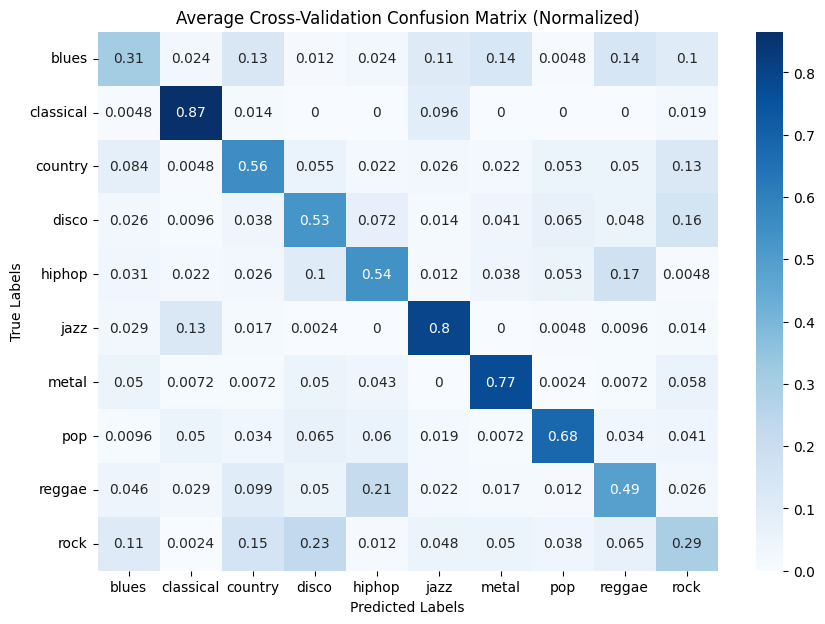

In [2]:
# Perform manual 5-fold cross-validation on a SVM model with a Radial Basis Function (RBF) kernel
# Note that this manual process was done to ensure that for each fold, all 4 versions of a song remain on the same side of the train-test split.
# This was done by using the base_num as the split index, which also ensured that the testing data for each fold had the same number of songs
# from each genre (meaning that each genre had the same support, ensuring a more inclusive evaluation of the model's performance)

# Initialize the lists that will hold the performance metrics for each fold and initialize the aggregated confusion matrix 
num_folds = 5
fold_size = 100 // num_folds
results = []
accuracies = []
aggregated_cm = np.zeros((len(np.unique(df['genre'])), len(np.unique(df['genre']))))

# Loop through each fold, defining the training and testing indices based on the 'base_num' index. Then train a SVM with a RBF kernel and 
# extract the model accuracy, precision, recall, and F1-score for each genre, as well as the confusion matrix for that fold.
# Then append metrics to their respective lists
for fold in range(num_folds):
    # Define train and test indices for 'base_num'
    test_start = fold * fold_size
    test_end = test_start + fold_size
    
    # Split the dataset for the current fold
    train_df = df[~df['base_num'].between(test_start, test_end)]
    test_df = df[df['base_num'].between(test_start, test_end)]
    
    # Define the training and testing sets (splitting into features and labels)
    X_train = train_df.drop(['filename', 'base_name', 'genre', 'base_num'], axis=1)
    y_train = train_df['genre']
    X_test = test_df.drop(['filename', 'base_name', 'genre', 'base_num'], axis=1)
    y_test = test_df['genre']
    
    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train the SVM model and make a prediction of the genre
    svm_model = SVC(kernel='rbf', gamma='scale')
    svm_model.fit(X_train_scaled, y_train)
    y_pred = svm_model.predict(X_test_scaled)
    
    # Computer the accuracy for this fold and append it to the accuracy list 
    accuracies.append(accuracy_score(y_test, y_pred))
    
    # Collect the precision, recall, and F1-score for each genre for this fold and append it to the results list
    precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average=None, labels=np.unique(df['genre']))
    results.append((precision, recall, fscore))
    
    # Compute the confusion matrix for this fold and add it towards the aggregated confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(df['genre']))
    aggregated_cm += cm

# Calculate the average metrics across all 5 folds
avg_precision = np.mean([result[0] for result in results], axis=0)
avg_recall = np.mean([result[1] for result in results], axis=0)
avg_fscore = np.mean([result[2] for result in results], axis=0)
avg_accuracy = np.mean(accuracies)

# Calculate the average confusion matrix across all 5 folds (normalized across each row)
avg_cm = aggregated_cm.astype('float') / aggregated_cm.sum(axis=1)[:, np.newaxis]

# Extract all 10 genres from the dataframe
labels = np.unique(df['genre'])

# Print average results of the 5-fold cross validation
print('Average classification report:')
for i, label in enumerate(labels):
    print(f'{label}: Precision: {avg_precision[i]}, Recall: {avg_recall[i]}, F1-Score: {avg_fscore[i]}')

print(f'\nAverage Model Accuracy: {avg_accuracy}')

# Plot the average normalized confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(avg_cm, annot=True, xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Average Cross-Validation Confusion Matrix (Normalized)')
plt.show()


Average classification report:
blues: Precision: 0.3990509106868554, Recall: 0.24869047619047616, F1-Score: 0.3004478144995262
classical: Precision: 0.88033653539652, Recall: 0.8803571428571428, F1-Score: 0.873681000599387
country: Precision: 0.513357875813613, Recall: 0.5598809523809524, F1-Score: 0.5245422284123772
disco: Precision: 0.4364694774277195, Recall: 0.4371428571428571, F1-Score: 0.43591243057338014
hiphop: Precision: 0.49621362938832136, Recall: 0.4755952380952381, F1-Score: 0.46820592380571
jazz: Precision: 0.6482541432008494, Recall: 0.7517857142857143, F1-Score: 0.6934118378886527
metal: Precision: 0.69290286056319, Recall: 0.8153571428571429, F1-Score: 0.7457506653385172
pop: Precision: 0.6715953853200503, Recall: 0.7379761904761905, F1-Score: 0.6956469322156051
reggae: Precision: 0.4314535913861251, Recall: 0.4577380952380953, F1-Score: 0.44220756798901484
rock: Precision: 0.3282624020968814, Recall: 0.2522619047619048, F1-Score: 0.28362920244943723

Average Model Acc

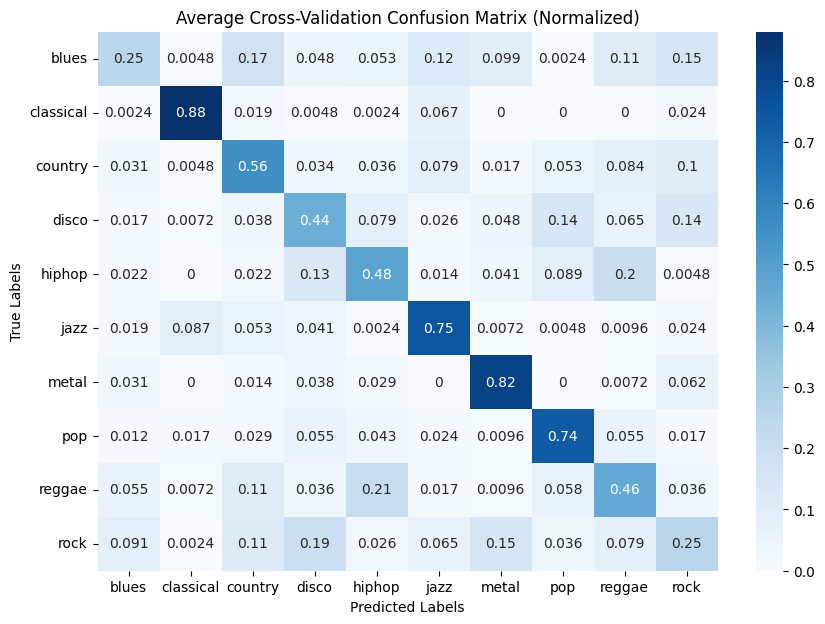

In [5]:
from sklearn.ensemble import RandomForestClassifier

# Perform manual 5-fold cross-validation on a RFC model
# Note that this manual process was done to ensure that for each fold, all 4 versions of a song remain on the same side of the train-test split.
# This was done by using the base_num as the split index, which also ensured that the testing data for each fold had the same number of songs
# from each genre (meaning that each genre had the same support, ensuring a more inclusive evaluation of the model's performance)

# Initialize the lists that will hold the performance metrics and confusion matrix for each fold
num_folds = 5
fold_size = 100 // num_folds
results = []
accuracies = []
aggregated_cm = np.zeros((len(np.unique(df['genre'])), len(np.unique(df['genre']))))

# Loop through each fold, defining the training and testing indices based on the 'base_num' index. Then train a RFC model and 
# extract the model accuracy, precision, recall, and F1-score for each genre, as well as the confusion matrix for that fold.
# Then append metrics to their respective lists
for fold in range(num_folds):
    # Define train and test indices for 'base_num'
    test_start = fold * fold_size
    test_end = test_start + fold_size
    
    # Split the dataset for the current fold
    train_df = df[~df['base_num'].between(test_start, test_end)]
    test_df = df[df['base_num'].between(test_start, test_end)]
    
    # Define the training and testing sets (splitting into features and labels)
    X_train = train_df.drop(['filename', 'base_name', 'genre', 'base_num'], axis=1)
    y_train = train_df['genre']
    X_test = test_df.drop(['filename', 'base_name', 'genre', 'base_num'], axis=1)
    y_test = test_df['genre']
    
    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train the RFC model and make a prediction of the genre
    rfc_model = RandomForestClassifier(random_state=20)
    rfc_model.fit(X_train_scaled, y_train)
    y_pred = rfc_model.predict(X_test_scaled)
    
    # Computer the accuracy for this fold and append it to the accuracy list 
    accuracies.append(accuracy_score(y_test, y_pred))
    
    # Collect the precision, recall, and F1-score for each genre for this fold and append it to the results list
    precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average=None, labels=np.unique(df['genre']))
    results.append((precision, recall, fscore))
    
    # Compute the confusion matrix for this fold and add it towards the aggregated confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(df['genre']))
    aggregated_cm += cm

# Calculate the average metrics across all 5 folds
avg_precision = np.mean([result[0] for result in results], axis=0)
avg_recall = np.mean([result[1] for result in results], axis=0)
avg_fscore = np.mean([result[2] for result in results], axis=0)
avg_accuracy = np.mean(accuracies)

# Calculate the average confusion matrix across all 5 folds (normalized across each row)
avg_cm = aggregated_cm.astype('float') / aggregated_cm.sum(axis=1)[:, np.newaxis]

# Extract all 10 genres from the dataframe
labels = np.unique(df['genre'])

# Print average results of the 5-fold cross validation
print('Average classification report:')
for i, label in enumerate(labels):
    print(f'{label}: Precision: {avg_precision[i]}, Recall: {avg_recall[i]}, F1-Score: {avg_fscore[i]}')

print(f'\nAverage Model Accuracy: {avg_accuracy}')

# Plot the average normalized confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(avg_cm, annot=True, xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Average Cross-Validation Confusion Matrix (Normalized)')
plt.show()

